In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [15]:
data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ice300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.0295-09.hi.nc')
plotvar = data.variables['hi'][0,:,:]
lont = data.variables['lont_bounds'][:,:,0]
latt = data.variables['latt_bounds'][:,:,0]

In [16]:
lont2 = lont[200:,1100]
latt2 = latt[200:,1100]

In [25]:
#################################################################
nice_cmap=plt.get_cmap('Blues')
lev_cmap = nice_cmap([250,240,230,220,210,190,180,170,150,130,110,100,90,80,70,60,50,40,30,20,10])
new_cmap = cols.ListedColormap(lev_cmap,"Blues")
nice_levels = [0.2,0.4,0.6,0.8,1,1.2,1.4,]
#nice_levels = [85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#################################################################

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


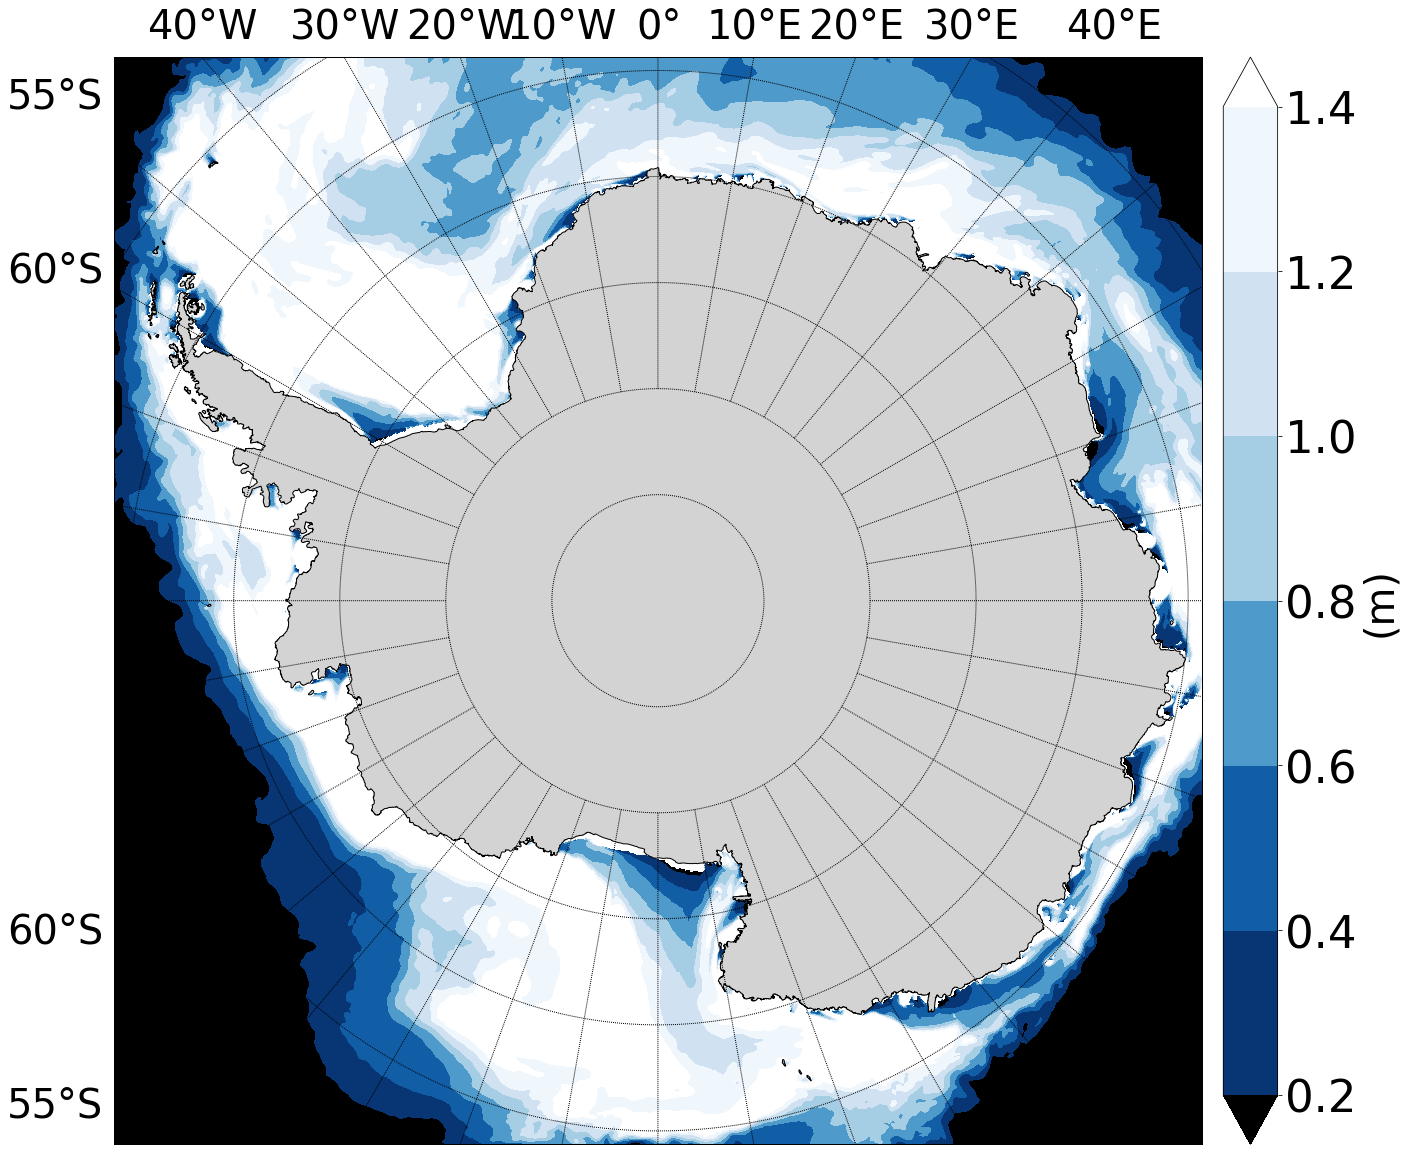

In [28]:
plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'40'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -90, lon_0 = 0,area_thresh = 100,\
              #width = 10000000,height = 15000000,resolution ='h')     
              width = 5700000,height = 5700000,resolution ='h') 
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
CP = map.contourf(x,y,plotvar,range(0,100),cmap = new_cmap,norm =norm,levels = nice_levels,extend='both')
CP.cmap.set_over('white')
CP.cmap.set_under('black')

#CS=map.contour(x,y,plotvar2,[0.1,0.3],colors = 'green', linestyles = 'solid',linewidths=2)
#plt.clabel(CS,fontsize=30,fmt='%1.1f')

cbar =map.colorbar(CP,ticks = nice_levels)
cbar.ax.tick_params(labelsize=45) 
cbar.set_label('(m)', **my_font)
#plt.suptitle("TIME 0119-10",**my_font)
#plt.xlabel("Time 295-09 (sea ice thickness)",**my_font)
plt.savefig("ice30009new.png",bbox_inches='tight')